# Bank Customers
*Jaime Avendaño*  
  
This is a machine learning notebook. The objective is to predict whether or not a bank customer will be able to retire.  
The main model is based on Suport Vector Machines.

### Dataset:
* Customer ID
* Age (in years)
* 401K Savings (in dollars)

### Target:
* Retire (1 = can retire; 0 = can't retire)

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from janitor import clean_names
%matplotlib inline

In [51]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
train = pd.read_csv('Course_Data\Bank_Customer_retirement.csv')
train = train.clean_names()
train.head()

,customer_id,age,401k_savings,retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [53]:
train.shape

(500, 4)

# EDA

In [54]:
train.retire.value_counts()

1    250
0    250
Name: retire, dtype: int64

<Figure size 864x864 with 0 Axes>

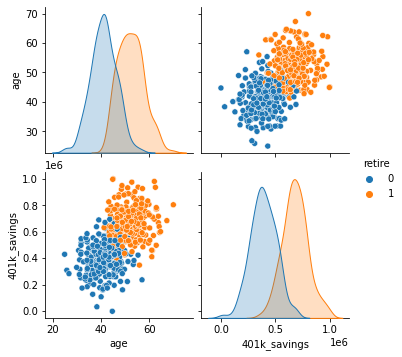

In [55]:
plt.figure(figsize=(12, 12))
sns.pairplot(train, hue='retire', vars=['age', '401k_savings'])

# Data Cleaning

1. Drop columns: customer_id
2. Standard Scaler: age & 401k_savings

In [56]:
train = train.drop(columns=['customer_id'])

In [57]:
scaler = StandardScaler()
num_features = ['age', '401k_savings']

scaler.fit(train[num_features])
train_scaled = pd.DataFrame(scaler.transform(train[num_features]), columns=num_features)
train = pd.concat([train.drop(columns=num_features), train_scaled], axis=1)

In [58]:
train.head()

,retire,age,401k_savings
0,0,-0.973572,-1.134123
1,1,1.200747,1.246411
2,1,1.319138,1.528209
3,0,-0.391363,-0.217598
4,1,1.024339,0.834460


# Model Training

In [59]:
X = train.drop(columns=['retire']).values
y = train.retire.values

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
svc = SVC(random_state = 42)
svc.fit(X_train, y_train)

SVC(random_state=42)

# Model Testing

In [62]:
y_pred = svc.predict(X_test)

<AxesSubplot:>

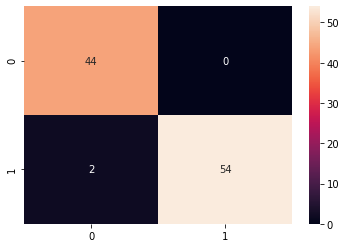

In [63]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       1.00      0.96      0.98        56

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [65]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# Model Improvements

In [66]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 
              'kernel': ['linear', 'rbf', 'sigmoid']} 

In [67]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)

In [68]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ................ C=0.1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ................ C=0.1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ................ C=0.1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ................ C=0.1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ................ C=0.1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.8s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             verbose=2)

In [69]:
grid.best_params_

{'C': 0.1, 'gamma': 100, 'kernel': 'sigmoid'}

In [70]:
grid.best_estimator_

SVC(C=0.1, gamma=100, kernel='sigmoid')

<AxesSubplot:>

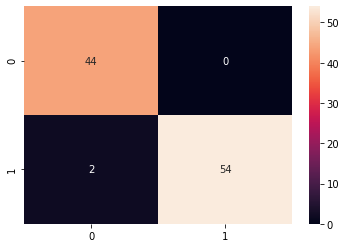

In [71]:
grid_pred = grid.predict(X_test)
cm = confusion_matrix(y_test, grid_pred)
sns.heatmap(cm, annot=True)

In [72]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       1.00      0.96      0.98        56

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



# Visualizing the border

In [83]:
x1_min, x2_min = scaler.inverse_transform([X_test[:,0].min(), X_test[:, 1].min()])
x1_max, x2_max = scaler.inverse_transform([X_test[:,0].max(), X_test[:, 1].max()])
x1_min, x1_max, x2_min, x2_max

(29.98287903, 62.57303128, 161499.2806, 936001.5611)

In [84]:
X1, X2 = np.meshgrid(np.arange(start = 25, stop = 65, step = 1),
                     np.arange(start = 150_000, stop = 1_000_000, step = 25_000))
X1.shape, X2.shape

((34, 40), (34, 40))

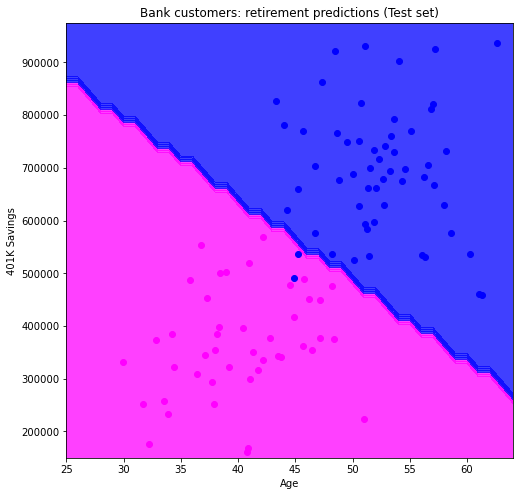

In [86]:
# plot the boundary using the trained classifier
# If classified as 0 it will be magenta, and if it is classified as 1 it will be shown in blue 
from matplotlib.colors import ListedColormap
plt.figure(figsize=(8, 8))

plt.contourf(X1, X2, grid.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
X_test_unscaled = scaler.inverse_transform(X_test)
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_test_unscaled[y_test == j, 0], X_test_unscaled[y_test == j, 1],
                c = 'magenta' if j == 0 else 'blue')

plt.title('Bank customers: retirement predictions (Test set)')
plt.xlabel('Age')
plt.ylabel('401K Savings')
plt.show()